In [23]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import make_blobs

In [13]:
X, y = make_blobs(n_samples=100, centers=3, n_features=10)

In [14]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [15]:
model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model.fit(x_train,y_train,eval_set=[(x_test,y_test),(x_train,y_train)],
          verbose=20,eval_metric='logloss')

[20]	training's multi_logloss: 0.150431	training's multi_logloss: 0.150431	valid_0's multi_logloss: 0.171385	valid_0's multi_logloss: 0.171385
[40]	training's multi_logloss: 0.0272034	training's multi_logloss: 0.0272034	valid_0's multi_logloss: 0.034299	valid_0's multi_logloss: 0.034299
[60]	training's multi_logloss: 0.0053143	training's multi_logloss: 0.0053143	valid_0's multi_logloss: 0.00798451	valid_0's multi_logloss: 0.00798451
[80]	training's multi_logloss: 0.00108475	training's multi_logloss: 0.00108475	valid_0's multi_logloss: 0.00199119	valid_0's multi_logloss: 0.00199119
[100]	training's multi_logloss: 0.000228494	training's multi_logloss: 0.000228494	valid_0's multi_logloss: 0.00054054	valid_0's multi_logloss: 0.00054054


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.09, max_depth=-5,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [16]:
print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)))

Training accuracy 1.0000
Testing accuracy 1.0000


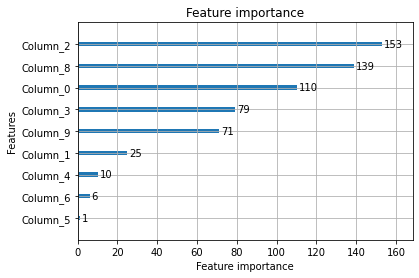

In [17]:
lgb.plot_importance(model)

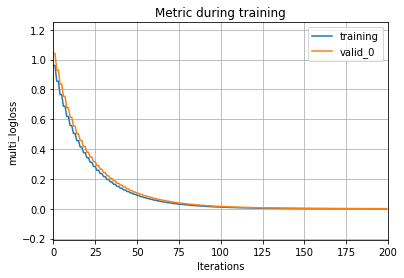

In [18]:
lgb.plot_metric(model)

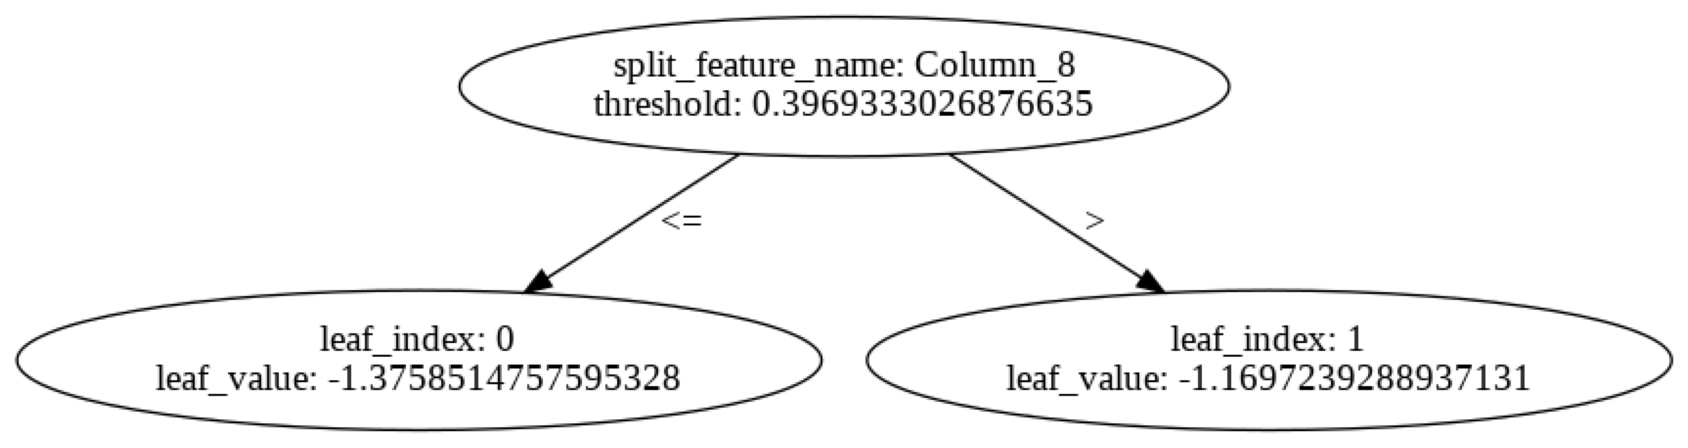

In [19]:
lgb.plot_tree(model,figsize=(30,40))

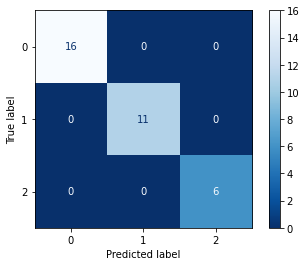

In [20]:
metrics.plot_confusion_matrix(model,x_test,y_test,cmap='Blues_r')

In [21]:
print(metrics.classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         6

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33

